## Hypothesis Testing

Hypothesis testing is a statistical method that is used in making a statistical decision using experimental data. Hypothesis testing is basically an assumption that we make about a population parameter. It evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis

Definitions:

**Null Hypothesis**, $H_0$: The null hypothesis assumes that nothing interesting is going on between whatever variables you're testing. The exact form of the null hypothesis varies from test to test: if you're testing whether two groups are different, the null hypothesis states that the groups are same. For example, if you want to test whether the average age of voters in your home state differs from the national average, the null hypothesis would be that there is no difference between the average.

**Alternative Hypothesis**, $H_1$: The alternative hypothesis assumes that something interesting is going on between the variables you're testing. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your state does in fact differ from the national average.

**Significance Level**, $\alpha$: It refers to teh degree of significance in which we accept or reject the null hypothesis. 100% accuracy is not possible for accepting a hypothesis, so we, therefore select a level of significance that is usually 5% (0.05).

$$\text{Significance level}, \alpha = 1 - \text{Confidence Level}$$

or (in percentages)

$$\text{Significance level}, \alpha = 100 - \text{Confidence Level}$$

For example, If the confidence level is 95% (0.95) then the significance level is 5% (0.05).

**p-Value**: After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.


### Types of Tests

There are different types of test, here are the ones which we will cover:
- **t-Test**: Genrally used for small sample sizes $(n < 30)$, and when population's standard deviation (or variance) is unknown.
- **z-Test**: Generally used for large sample sizes $(n \ge 30)$, and when the population's standard deviation (or variance) is known.
- **F-Test** (ANOVA): Used for comparing values of more than two variables.
- **Chi-Square Test**: Used for comparing categorical data.

**Note**: Most parametric tests, require a population which is somewhat normally distributed. If not, apply normalization to the dataset.

### One-Tailed Test vs. Two-Tailed Test

- One-Tailed Test:
    - A one-tailed test may be either left-tailed or right-tailed.
    - A left-tailed test is used when the alternative hypothesis states that the true value of the parameter specified in the null hypothesis is **less than** the null hypothesis claims.
    - A right-tailed test is used when the alternative hypothesis states that the true value of the parameter specified in the null hypothesis is **greater than** the null hypothesis claims.

- Two-Tailed Test:
    - The main difference between one-tailed and two-tailed tests is that one-tailed tests will only have one critical region whereas two-tailed tests will have two critical regions. If we require a $100(1 - \alpha)$ % confidence interval we have to make some adjustments when using a two-tailed test.
    - The confidence interval must remain a constant size, so if we are performing a two-tailed test, as there are twice as many critical regions then these critical regions must be half the size. This means that when we read the tables, when performing a two-tailed test, we need to consider $\alpha / 2$ rather than $\alpha$.


<img src=https://ars.els-cdn.com/content/image/3-s2.0-B9780128008522000092-f09-06-9780128008522.jpg />


### One-Sample t-Test
A one-sample t-test checks whether a sample mean differs from the population mean.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy.stats import poisson

In [2]:
np.random.seed(6)

population = np.concatenate ((
    poisson.rvs(loc=18, mu=35, size=150000),
    poisson.rvs(loc=18, mu=10, size=100000)
))

sample_1 = np.concatenate ((
    poisson.rvs(loc=18, mu=30, size=30),
    poisson.rvs(loc=18, mu=10, size=20)
))

print(population.mean())
print(sample_1.mean())

43.000112
39.26


Notice that we used a slightly different combination of distributions to generate the sample data, so we know that the two means are different. Let's conduct a t-test at 95% confidence level (5% significance level).
To conduct a one-sample t-test we can use the scipy.stats.ttest_1samp() function.

In [3]:
from scipy.stats import ttest_1samp
ttest_1samp(
    a=sample_1,                 # Sample data
    popmean=population.mean()   # Population mean
)

TtestResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678, df=49)

The test result shows the test statistic "t" is equal to -2.57. This tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the confidence interval, we reject the null hypothesis.

In [4]:
from scipy.stats import t
c1 = t.ppf(q=0.025, df=49)
c2 = t.ppf(q=0.975, df=49)

print(f"95% Confidence Intervals: {(c1, c2)}")

95% Confidence Intervals: (-2.0095752344892093, 2.009575234489209)


We can calculate the chances of getting a result as extreme as the one we observed (known as the p-value) by passing the test-statistic in the scipy.stats.t.cdf() function.

In [5]:
t.cdf(x=-2.57, df=49) * 2       # Multiplying by two for two tailed-test

0.013261652625859802

**Note**: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.0132 means we'd expect to see data as extreme as our sample due to chance about 1.32% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level $\alpha$ (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture the population mean of 43:

In [6]:
sigma = sample_1.std() / math.sqrt(50)      # Sample stdev / sample size

t.interval(
    0.95,                   # Confidence level
    df=49,                  # Degrees of freedom
    loc=sample_1.mean(),    # Sample mean
    scale=sigma
)

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to change, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [7]:
t.interval(
    0.99,                   # Confidence level
    df=49,                  # Degrees of freedom
    loc=sample_1.mean(),    # Sample mean
    scale=sigma             # Standard dev estimate
)

(35.40547994092107, 43.11452005907893)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01, and we fail to reject the null hypothesis (other way of saying null hypothesis is accepted).

### Two-Sample T-Test

A two-sample t-test investigate whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. You can conduct a two-sample t-test by passing with the scipy.stats.ttest_ind() function.

In [8]:
np.random.seed(12)

sample_2 = np.concatenate((
    poisson.rvs(loc=18, mu=33, size=30),
    poisson.rvs(loc=18, mu=13, size=20)
))

print(sample_2.mean())

42.8


In [9]:
from scipy.stats import ttest_ind

ttest_ind(
    a=sample_1,
    b=sample_2,
    equal_var=False     # Assume samples have equal variance ?
)

TtestResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748, df=97.9724575497005)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

### Paired T-Test

The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.

We can conduct a paired t-test using the scipy.stats.ttest_rel().

In [10]:
from scipy.stats import norm

np.random.seed(11)

before = norm.rvs(scale=30, loc=250, size=100)
after = before + norm.rvs(scale=5, loc=-1.25, size=100)

weight = {
    "weight_before": before,
    "weight_after": after,
    "weight_change": after - before
}

weight['weight_change'].mean()

-1.2303750057960445

The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [11]:
from scipy.stats import ttest_rel

ttest_rel(
    a=before,
    b=after
)

TtestResult(statistic=2.5720175998568284, pvalue=0.011596444318439857, df=99)

The p-value in the test output shows that the chances of seeing this large of a difference between samples due to chance is just over 1%.

### Type I and Type II Error

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories.

Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level $\alpha$, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

<img src="https://www.simplypsychology.org/wp-content/uploads/type-1-and-2-errors.jpg" width=500 />

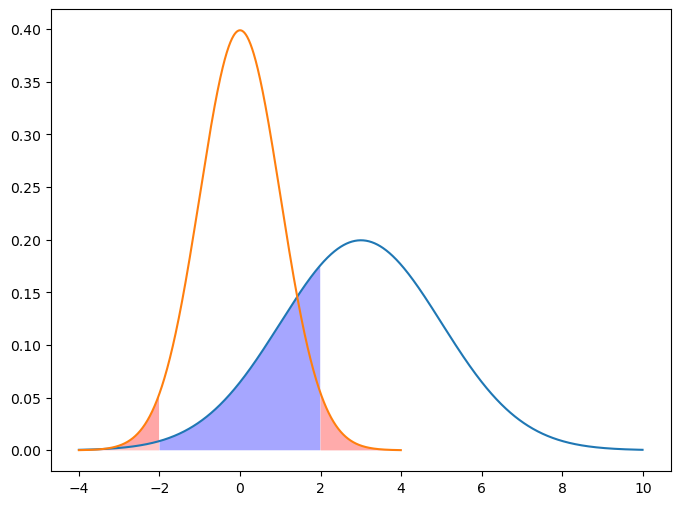

In [12]:
from scipy.stats import norm

plt.figure(figsize=(8,6))

plt.plot(np.arange(-4,10,0.01), norm.pdf(np.arange(-4,10,0.01),loc=3,scale=2))
plt.plot(np.arange(-4,4,0.01), norm.pdf(np.arange(-4,4,0.01)))

plt.fill_between(
    x=np.arange(-4,-2,0.01),
    y1=norm.pdf(np.arange(-4,-2,0.01)),
    facecolor='red',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(-2,2,0.01),
    y1=norm.pdf(np.arange(-2,2,0.01)),
    facecolor='white',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(2,4,0.01),
    y1=norm.pdf(np.arange(2,4,0.01)),
    facecolor='red',
    alpha=0.5
)

plt.fill_between(
    x=np.arange(-4,-2,0.01),
    y1=norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2),
    facecolor='white',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(-2,2,0.01),
    y1=norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2),
    facecolor='blue',
    alpha=0.35
)

plt.fill_between(
    x=np.arange(2,10,0.01),
    y1=norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
    facecolor='white',
    alpha=0.35
)


plt.show()

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.

The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on thr gith. Note that the Type II error rate is the area under the alternative distribution within the quantiles determines by the null distribution and the confidence level. We can calculate the type II error rate for the distributions as follows,

In [13]:
lower_quantile = norm.ppf(0.025)
upper_quantile = norm.ppf(0.975)

# Area under alternative, to the left the lower cutoff value
low = norm.cdf(lower_quantile, loc=3, scale=2)

# Area under alternative, to the left of the upper cutoff value
high = norm.cdf(upper_quantile, loc=3, scale=2)

# Area under the alternative, between the cutoffs (Type II error)

high - low

0.294956061112323

With the normal distribution above, we'd fail to reject the null hypothesis about 30% of the time, because the distributions are close enough together that they have significant overlap.